In [4]:

pip install mysql-connector

Note: you may need to restart the kernel to use updated packages.


In [13]:
import mysql.connector

conn = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="Driss123",
    database="productmanagement",
    auth_plugin="mysql_native_password",
)
print("Connected:", conn.is_connected())

cur = conn.cursor()
cur.execute("SELECT VERSION(), @@port, CURRENT_USER();")
print(cur.fetchone())

cur.close()
conn.close()

Connected: True
('8.0.44', 3306, 'root@localhost')


In [5]:
conn = connect_db()

Erreur : Authentication plugin 'caching_sha2_password' is not supported


In [22]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 3.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.2 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 4.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 4.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 3.9 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 3.7 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.5 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 3.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 3.2 MB/s eta 0:00:01
   ----------------------------

In [3]:
pip install pandas

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 441.3 kB/s eta 0:00:21
   -- ------------------------------------- 0.5/9.7 MB 441.3 kB/s eta 0:00:21
   -- ------------------------------------- 0.5/9.7 MB 441.3 kB/s eta 0:00:21
   -- ------------------------------------- 0.5/9.7 MB 441.3 kB/s eta 0:00:21
   --- ------------------------------------ 0.8/9.7 MB 342.4 kB/s eta 0:00:27
   --- ------------------------------------ 0.8/9.7 MB 342.4 kB/s eta 0:00:27
   --- ------------------------------------ 0.8/9.7 MB 342.4 kB/s eta 0:00:27
   --- ------------------------------------ 0.8/9.7 MB 342.4 kB/s eta 0:00:27
   --- ------------------------

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [34]:
# 1) Load CSV files (change names if needed)
order = pd.read_csv("Order.csv")         # or Sales.csv
order_item = pd.read_csv("order_item.csv") # lines of products per order
products = pd.read_csv("Products.csv")     # contains stock info
customers = pd.read_csv("Customer.csv")    # customers (optional if already in orders)

# 2) Clean column names (remove spaces)
for df in [order, order_item, products, customers]:
    df.columns = df.columns.str.strip()

# Quick check
print("Orders columns:", order.columns.tolist())
print("OrderItems columns:", order_item.columns.tolist())
print("Products columns:", products.columns.tolist())
print("Customers columns:", customers.columns.tolist())

Orders columns: ['id', 'order_date', 'customer_id', 'Unnamed: 3']
OrderItems columns: ['id', 'quantity', 'order_id', 'product_id', 'unit_price']
Products columns: ['id', 'name', 'category', 'price', 'quantity_in_stock']
Customers columns: ['id', 'name', 'email']


In [42]:
COL_ORDER_ID       = "id"
COL_ORDER_DATE     = "order_date"     # must be a date
COL_CUSTOMER_ID    = "customer_id"

COL_ITEM_ORDER_ID  = "id"
COL_PRODUCT_ID     = "product_id"
COL_QTY            = "quantity"
COL_UNIT_PRICE    = "unit_price"         # unit price in order_items (best case)

COL_STOCK          = "quantity_in_stock"
COL_PRODUCT_NAME   = "name"


In [38]:
# Parse dates
order[COL_ORDER_DATE] = pd.to_datetime(order[COL_ORDER_DATE], errors="coerce")

# Ensure numeric
order_item[COL_QTY] = pd.to_numeric(order_item[COL_QTY], errors="coerce").fillna(0)
order_item[COL_UNIT_PRICE] = pd.to_numeric(order_item[COL_UNIT_PRICE], errors="coerce").fillna(0)

# Revenue per line
order_item["LineRevenue"] = order_item[COL_QTY] * order_item[COL_UNIT_PRICE]

# Merge orders + items
sales = order_item.merge(
    order[[COL_ORDER_ID, COL_ORDER_DATE, COL_CUSTOMER_ID]],
    left_on=COL_ITEM_ORDER_ID,
    right_on=COL_ORDER_ID,
    how="left"
)

# Add Month
sales["Month"] = sales[COL_ORDER_DATE].dt.to_period("M")
sales.head()

,id,quantity,order_id,product_id,unit_price,LineRevenue,order_date,customer_id,Month
0,4,1,1,1,15000.0,15000.0,2026-02-22 17:23:54,2,2026-02
1,5,2,2,1,15000.0,30000.0,2026-02-22 17:24:08,1,2026-02


In [39]:
revenue_per_month = sales.groupby("Month")["LineRevenue"].apply(np.sum).sort_index()
print(revenue_per_month)

Month
2026-02    45000.0
Freq: M, Name: LineRevenue, dtype: float64


In [40]:
# By revenue
best_selling_by_revenue = sales.groupby(COL_PRODUCT_ID)["LineRevenue"].apply(np.sum).sort_values(ascending=False)
print("Top 10 products by revenue:")
print(best_selling_by_revenue.head(10))

# By quantity
best_selling_by_qty = sales.groupby(COL_PRODUCT_ID)[COL_QTY].apply(np.sum).sort_values(ascending=False)
print("\nTop 10 products by quantity:")
print(best_selling_by_qty.head(10))

Top 10 products by revenue:
product_id
1    45000.0
Name: LineRevenue, dtype: float64

Top 10 products by quantity:
product_id
1    3
Name: quantity, dtype: int64


In [46]:
print("products columns:", products.columns.tolist())
print(products.head(3))
# 1) clean columns
products.columns = products.columns.str.strip()

# 2) detect product id column in products
id_candidates = ["id", "ID", "product_id", "ProductID", "productId"]
name_candidates = ["name", "Name", "product_name", "ProductName", "title", "libelle"]

prod_id_col = next((c for c in id_candidates if c in products.columns), None)
prod_name_col = next((c for c in name_candidates if c in products.columns), None)

print("Detected in products:", prod_id_col, prod_name_col)

if prod_id_col is None:
    raise ValueError(f"No product id column found in products. Columns = {products.columns.tolist()}")
if prod_name_col is None:
    # si pas de nom produit, on merge فقط على id
    prod_name_col = prod_id_col

# 3) best_selling dataframe
tmp = best_selling_by_revenue.reset_index()
tmp.columns = ["product_id_tmp", "revenue"]

# 4) merge
tmp2 = tmp.merge(
    products[[prod_id_col, prod_name_col]],
    left_on="product_id_tmp",
    right_on=prod_id_col,
    how="left"
)

print(tmp2.head(10))

products columns: ['id', 'name', 'category', 'price', 'quantity_in_stock']
   id             name      category    price  quantity_in_stock
0   1    IPHONE 17 PRO         phone  15000.0                 15
1   7        Laptop HP  informatique   7500.5                 10
2   8  Souris Logitech   accessoires    150.0                 50
Detected in products: id name
   product_id_tmp  revenue  id           name
0               1  45000.0   1  IPHONE 17 PRO


In [47]:
# Total revenue per order
order_totals = sales.groupby(COL_ORDER_ID)["LineRevenue"].apply(np.sum)

# Average order value
aov = np.mean(order_totals)
print("Average Order Value (AOV):", aov)

Average Order Value (AOV): 22500.0


In [48]:
orders_per_customer = order.groupby(COL_CUSTOMER_ID)[COL_ORDER_ID].nunique().sort_values(ascending=False)
print("Top customers by number of orders:")
print(orders_per_customer.head(10))

avg_orders_per_customer = np.mean(orders_per_customer)
print("\nAverage orders per customer:", avg_orders_per_customer)

Top customers by number of orders:
customer_id
1    3
2    3
9    1
Name: id, dtype: int64

Average orders per customer: 2.3333333333333335


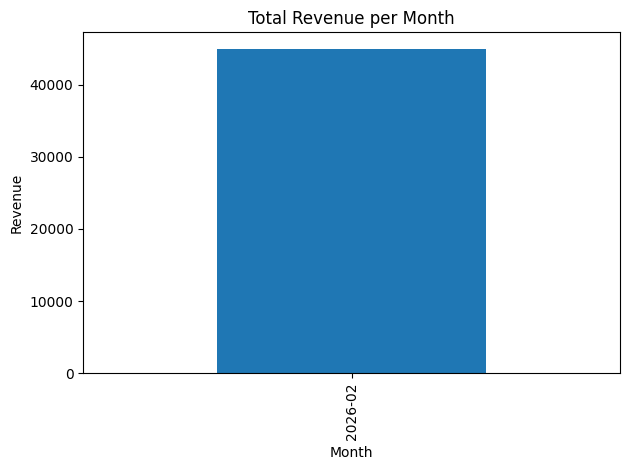

In [49]:
# Revenue per month chart
revenue_per_month.astype(float).plot(kind="bar")
plt.title("Total Revenue per Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

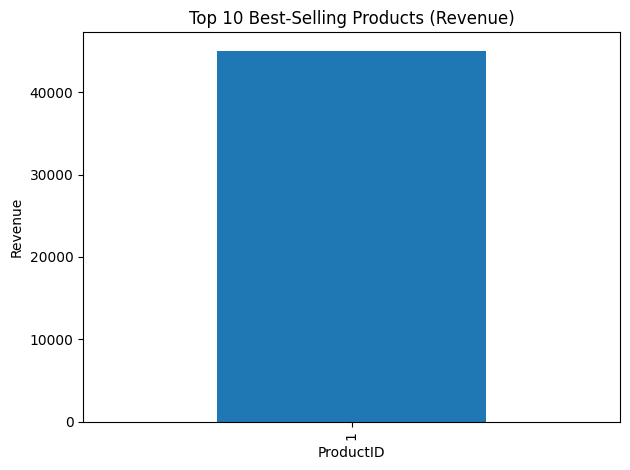

In [50]:
# Top 10 products by revenue chart
best_selling_by_revenue.head(10).astype(float).plot(kind="bar")
plt.title("Top 10 Best-Selling Products (Revenue)")
plt.xlabel("ProductID")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()